In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
import csv
import pandas as pd

DATA_FILE = '../data/09-19-Amazon-Ranking-Analysis.csv'
Amazon = pd.read_csv(DATA_FILE, encoding='latin-1')

## The objective is to first clean the dataset, and then investigate the dataset to answer this question: 'how does the price/Vendor_type affect an item's rank?'. 

### Clean the data

In [127]:
Amazon.shape

(6973, 7)

In [10]:
Amazon.head() 

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [11]:
Amazon.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

#### The dataset contains different sources of data for 'rank', 'VendorType' and 'Price', and each of them is quite different.
#### For example:

In [12]:
Amazon['BBVendorType'].value_counts()

Amazon                                5783
O                                      715
FBA                                    470
Ships from and sold by Amazon.com.       5
Name: BBVendorType, dtype: int64

In [13]:
Amazon['ScrapedIndexVendorType'].value_counts()

Other     6367
FBA        409
Amazon     192
7.99         2
57.97        1
11.04        1
6.49         1
Name: ScrapedIndexVendorType, dtype: int64

#### In this EDA, I will only use the data from Corrected ScrapedIndex, which makes more sense to me. 

In [14]:
Amazon = Amazon.drop(['ScrapedIndex', 'ScrapedIndexTrueRank','ScrapedIndexPrice','BBCorrectedPrice', 'BBVendor', 'BBVendorType','BBScrapedPrice'], axis=1)

In [15]:
Amazon.head()

,Index,ProductName,ScrapeDate,CorrectedIndexTrueRank,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,20.99,Supplement Warriors,Other
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,25.02,Sharp Nutrition,FBA
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,speedy tests,Other
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Drug Abuse Control,Other
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Lowest Priced Tests,Other


#### Simplify the column names

In [16]:
Amazon.columns=('Index', 'ProductName', 'ScrapeDate', 'Rank',
       'Price', 'Vendor', 'VendorType', )

In [17]:
Amazon.head()

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,20.99,Supplement Warriors,Other
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,25.02,Sharp Nutrition,FBA
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,speedy tests,Other
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Drug Abuse Control,Other
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Lowest Priced Tests,Other


#### Check the Vendor types

In [18]:
Amazon['VendorType'].value_counts()

Other     6367
FBA        409
Amazon     192
7.99         2
57.97        1
11.04        1
6.49         1
Name: VendorType, dtype: int64

#### Cleaning the Vendor types. Re-assign the numbers to 'Other' Vendor type

In [19]:
Amazon['VendorType'].replace(('7.99', '57.97','6.49', '11.04'), 'Other', inplace = True)
Amazon['VendorType'].value_counts()

Other     6372
FBA        409
Amazon     192
Name: VendorType, dtype: int64

#### Check the missing value

In [20]:
Amazon.isnull().sum()

Index          0
ProductName    0
ScrapeDate     0
Rank           0
Price          0
Vendor         0
VendorType     0
dtype: int64

#### Basic information of the price by vendor types

In [21]:
Amazon.groupby('VendorType')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
VendorType,,,,,,,,
Amazon,192.0,55.745885,89.480572,7.69,17.025,26.285,57.7500,706.11
FBA,409.0,69.176724,125.475677,9.68,18.530,26.050,57.4000,711.82
Other,6372.0,54.688732,69.346714,2.38,20.420,32.825,56.0025,931.80


#### Basic information of the rank by vendor types

In [22]:
Amazon.groupby('VendorType')['Rank'].describe()

,count,mean,std,min,25%,50%,75%,max
VendorType,,,,,,,,
Amazon,192.0,6.864583,6.690025,1.0,2.0,5.0,9.0,39.0
FBA,409.0,13.679707,10.668012,1.0,6.0,11.0,18.0,75.0
Other,6372.0,22.507847,19.531792,1.0,7.0,16.0,33.0,107.0


#### Boxplot the price by these three vendor types

C:\Users\Zongyuan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


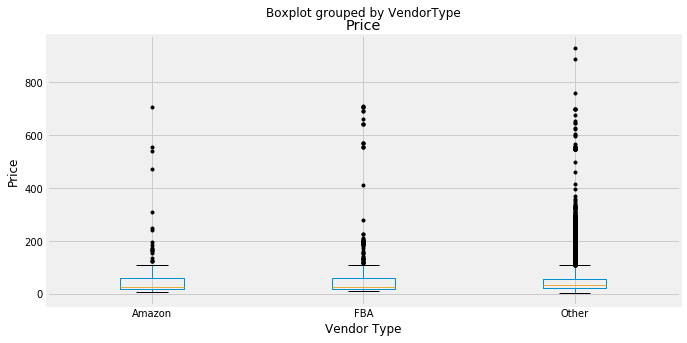

In [23]:
Amazon.boxplot(column = 'Price', by='VendorType', figsize=(11,5), sym='k.');

plt.xlabel('Vendor Type');
plt.ylabel('Price');

#### Boxplot the ranks of the product by these three vendor types. Product from Amazon rank averagely lower than other vendors.

C:\Users\Zongyuan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


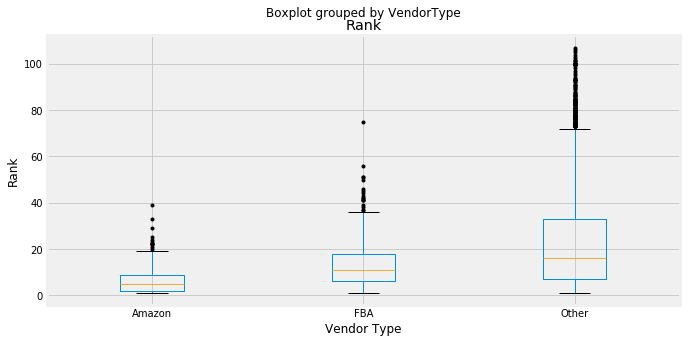

In [24]:
Amazon.boxplot(column = 'Rank', by='VendorType', figsize=(11,5), sym='k.')
plt.xlabel('Vendor Type');
plt.ylabel('Rank');

#### Histogram of the price by vendor types

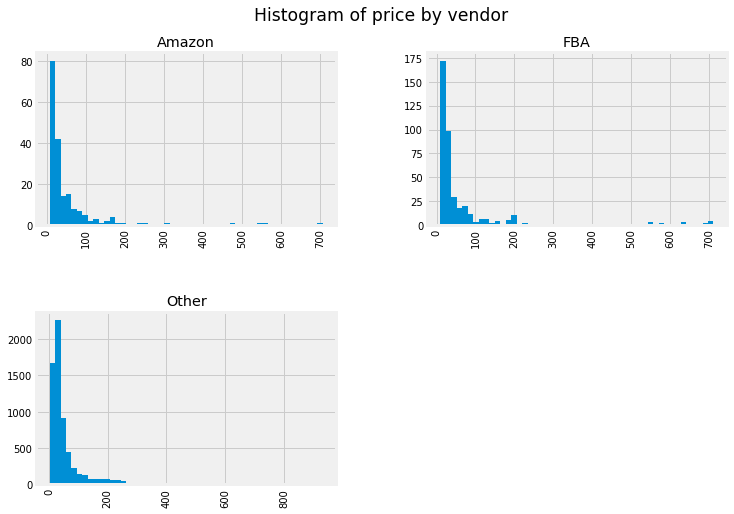

In [25]:
Amazon.hist(column='Price', by='VendorType', figsize=(12,8), bins=50);
plt.suptitle('Histogram of price by vendor', fontsize = 'xx-large');

#### Compare the rank of the product by vendor in histogram

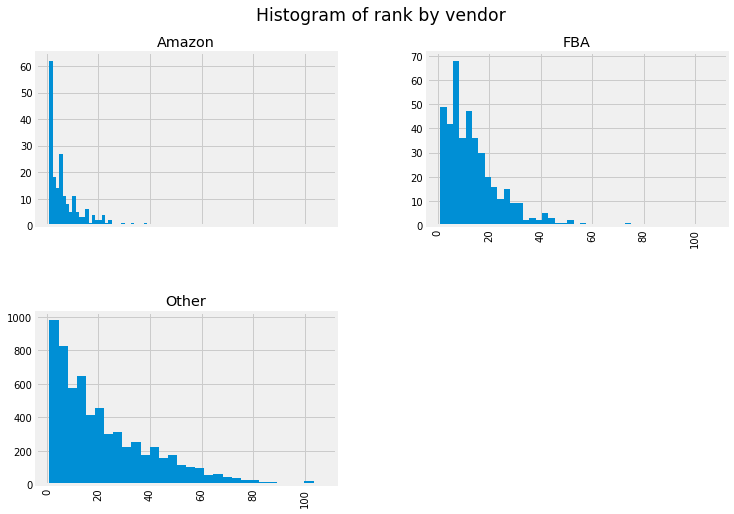

In [26]:
Amazon.hist(column='Rank', by='VendorType', figsize=(12,8),sharex=True, bins=30);
plt.suptitle('Histogram of rank by vendor', fontsize = 'xx-large');

#### Encode vendor types so that we can do the scatter plot 

In [27]:
Amazon.loc[:, 'Type_num'] = Amazon.loc[:, 'VendorType'].map({'Other':0, 'FBA': 1, 'Amazon':1})
Amazon.head()

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType,Type_num
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,20.99,Supplement Warriors,Other,0
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,25.02,Sharp Nutrition,FBA,1
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,speedy tests,Other,0
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Drug Abuse Control,Other,0
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,3.96,Lowest Priced Tests,Other,0


#### Scatter plot the relationship of Price and Rank by Vendor types

(0, 300)

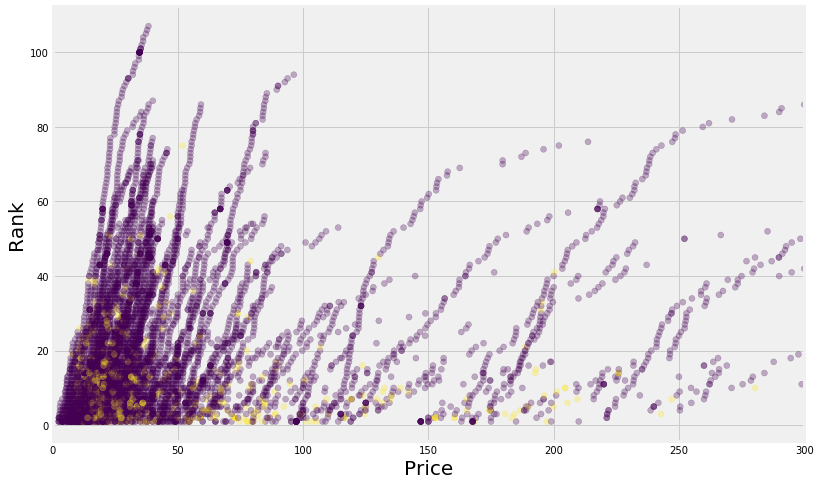

In [28]:
plt.figure(figsize=(12,8));
plt.scatter(data=Amazon, x='Price', y='Rank', c='Type_num', alpha = 0.3);
plt.xlabel('Price',fontsize=20);
plt.ylabel('Rank', fontsize=20);
plt.xlim(xmin=0, xmax = 300)

,Index,ProductName,ScrapeDate,Rank,Price,Vendor,VendorType,Type_num
6871,6871,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,1,13.08,ShopChanute,Other,0
6872,6872,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,2,13.13,MidAtlantic Merchant,Other,0
6873,6873,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,3,13.38,Gatzies,Other,0
6874,6874,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,4,13.46,SJS Commercial,Other,0
6875,6875,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,4,13.46,SJS Commercial,Other,0
6876,6876,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,5,13.76,ProMax Commerce,Other,0
6877,6877,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,6,13.77,"SIM Supply, Inc.",Other,0
6878,6878,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,7,13.95,Independence Fulfillment Services,Other,0
6879,6879,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,8,14.98,Hipp Modern Builders Supply,Other,0
6880,6880,Weber Grill Cleaner Spray - Professional Stren...,2016/8/29,9,15.04,My First Aid CompanyÂ®,Other,0


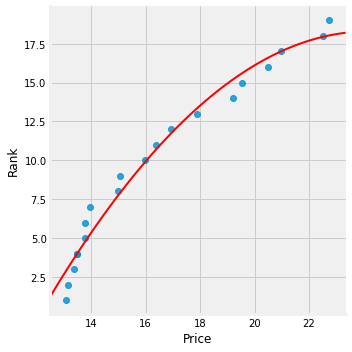

In [38]:
def same_product_name(name):
    df = Amazon.loc[Amazon['ProductName']==name, :]
    fig = sns.lmplot(x='Price', y='Rank', data= df, ci=None, line_kws={'color': 'red', 'linewidth': 2.0}, order=2);
    ax = fig.axes
    return df
same_product_name('Weber Grill Cleaner Spray - Professional Strength Degreaser - Non Toxic 16 oz Cleanser')

### Based on the scatter plot above, I found that, for each product, the prices varies and they are 'linearly' related to the rank of that product.

### Select sample size: statisticaly valid sample size

In [32]:
relevant = Amazon[Amazon.groupby('ProductName')['ProductName'].transform('size')>=20]

In [34]:
#by doing this, only the product with at least 20 listed prices are considered for the train/test modeling
print(relevant['ProductName'].value_counts().head())

print(relevant['ProductName'].value_counts().tail())

Fujifilm INSTAX Mini Instant Film (Rainbow)              154
Suncast GHW1732 Resin Wicker Trash Hideaway              115
Fiskars 45mm Contour Rotary Cutter (195210-1001)         106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit     95
Honeywell HT-908 Turbo Force Room Air Circulator Fan      90
Name: ProductName, dtype: int64
Weber Grill Cleaner Spray - Professional Strength Degreaser - Non Toxic 16 oz Cleanser                         20
Nikon D3300 24.2 MP CMOS Digital SLR with Auto Focus-S DX NIKKOR 18-55mm f/3.5-5.6G VR II Zoom Lens (Black)    20
Manitoba Harvest Hemp Hearts Raw Shelled Hemp Seeds, natural flavor, 1 Pound.                                  20
Pepperell Craft Making Assorted Pom Poms, Standard Colors, 750 Per Package                                     20
Comfort Zone Feliway Refills                                                                                   20
Name: ProductName, dtype: int64


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

### Define a function that use linear regression with polynomialfeatures for the modeling, the output will be metrics evaluation, cross_validation rmse, coefficient, and fitted-plot per the input product name 

In [39]:
def train_test(name, PolyNumber):
    df = relevant.loc[relevant['ProductName']==name, :]
   
    # the featured X and y
    X = df.loc[:, ['Price']]
    y = df.loc[:, 'Rank']
    
    # use polynomialfeature here to improve the fitting
    pf = PolynomialFeatures(degree=PolyNumber, include_bias=False)
    X = pf.fit_transform(X)
    
    # also add in train-test comparison
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # compare with null_rmse
    null_pred = y - np.mean(y)
    null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
    
    # cross-validation
    scores = cross_val_score(linreg, X, y, cv=10, scoring = 'neg_mean_squared_error')
    CV = np.mean(np.sqrt(-scores))
    
    # plot the figure with seaborn
    fig = sns.lmplot(x='Price', y='Rank', data= df, ci=None, line_kws={'color': 'red', 'linewidth': 2.0}, order=PolyNumber);
    ax = fig.axes
    
    # plot the figure with fitted results, comparing with seaborn plot
    fig2 = plt.plot(df.loc[:, 'Price'], linreg.predict(X), color = 'blue', linewidth = 2.0)
    plt.legend(['from seaborn','from lr fitting', "original data"])
    
    return print (' rmse:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n', 'cross-validation: ', CV, '\n', 'null_rmse:', null_rmse, '\n', 'coefficient:', linreg.coef_,)

### Taking a random product name, run this function, and adjust the polynomial degree

 rmse: 3.23315670037 
 cross-validation:  5.1534256062 
 null_rmse: 43.0111111111 
 coefficient: [ 3.55365683]


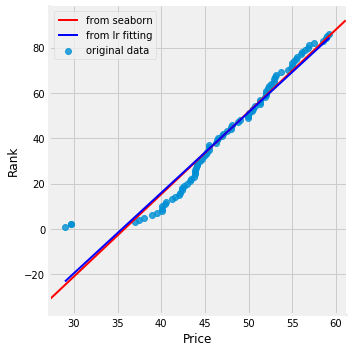

In [40]:
train_test('Honeywell HT-908 Turbo Force Room Air Circulator Fan', 1)

### The fitting line (blue line) is also pretty good, very similar to the fitting by seaborn (red line).

### Plot the linearregression fitted results (rmse) for all the products

In [69]:
def RMSE(name):
    df = relevant.loc[relevant['ProductName']==name, :]
   
    # the featured X and y
    X = df.loc[:, ['Price']]
    y = df.loc[:, 'Rank']
    
    # use polynomialfeature here to improve the fitting
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X = pf.fit_transform(X)
    
    # also add in train-test comparison
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # compare with null_rmse
    null_pred = y - np.mean(y)
    null_rmse = np.sqrt(metrics.mean_squared_error(null_pred, y))
    
    # cross-validation
    scores = cross_val_score(linreg, X, y, cv=10, scoring = 'neg_mean_squared_error')
    CV = np.mean(np.sqrt(-scores))
    
    
    return [CV, null_rmse]

In [70]:
# store all the product names into names as dataframe
names = pd.DataFrame(relevant.loc[:, 'ProductName'].value_counts())
# Iterating through the names list, store the results into rmse
rmse = pd.DataFrame([RMSE(name) for name in names.index])

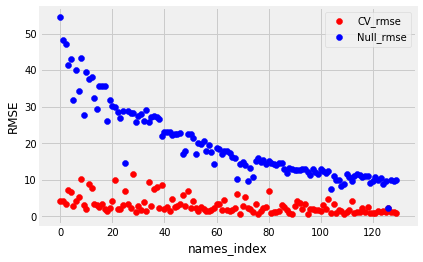

In [66]:
plt.scatter(x = list(range(0, names.shape[0])), y=rmse[0], color ='red');
plt.scatter(x = list(range(0, names.shape[0])), y=rmse[1], color ='blue');
plt.legend(['CV_rmse','Null_rmse'])
plt.xlabel('names_index');
plt.ylabel('RMSE');

### Conclusion: 
### 1. Rmse is reasonable compared with null_rmse across all the products listed in the dataset. 
### 2. With larger sample size, the fitting is better (larger difference between CV_rmse and Null_rmse)

### How about vendor typres? Use the treeregression to check if the vendor types has effect on the product ranking (Amazon related vs. other vendors)

In [179]:
from sklearn.tree import DecisionTreeRegressor

def treereg(name):
    df = relevant.loc[relevant['ProductName']==name, :]
       
    feature_cols = ['Price', 'Type_num']

    X = df.loc[:, feature_cols]
    y = df.loc[:, 'Rank']
    
    # choose the best depth
    RMSE_scores = []
    max_depth_range = list(range(1, 20))
    for depth in max_depth_range:
        treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
        scores = cross_val_score(treereg, X, y, cv=10, scoring = 'neg_mean_squared_error')
        CV = np.mean(np.sqrt(-scores))
        RMSE_scores.append(CV)
    best_depth = list(sorted(zip(RMSE_scores, max_depth_range))[0])[1]
    
    # use the best depth to refit the data
    treereg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
    treereg.fit(X, y)
    important_feature = pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance')
    
    # output the feature_importances
    return print('depth used:', best_depth, '\n', important_feature)

In [184]:
treereg('Fiskars 45mm Contour Rotary Cutter (195210-1001)')

depth used: 7 
     feature  importance
1  Type_num    0.000039
0     Price    0.999961


### Conlusion: The price affects the product ranking the most, vendor types has very minor effect